In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly as py
import plotly.graph_objs as go
init_notebook_mode(connected=True) #do not miss this line
#py.offline.iplot(fig)

In [4]:
df=pd.read_csv('../input/crime-against-women-20012014-india/crimes_against_women_2001-2014.csv')
df.head()

,Unnamed: 0,STATE/UT,DISTRICT,Year,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
0,0,ANDHRA PRADESH,ADILABAD,2001,50,30,16,149,34,175,0
1,1,ANDHRA PRADESH,ANANTAPUR,2001,23,30,7,118,24,154,0
2,2,ANDHRA PRADESH,CHITTOOR,2001,27,34,14,112,83,186,0
3,3,ANDHRA PRADESH,CUDDAPAH,2001,20,20,17,126,38,57,0
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,23,26,12,109,58,247,0


In [5]:
#Dropping District Column and Unnamed 0 column

df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.drop(['DISTRICT'],axis=1,inplace=True)

In [6]:
print(df['STATE/UT'].unique())
len(df['STATE/UT'].unique())

['ANDHRA PRADESH' 'ARUNACHAL PRADESH' 'ASSAM' 'BIHAR' 'CHHATTISGARH' 'GOA'
 'GUJARAT' 'HARYANA' 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'JHARKHAND'
 'KARNATAKA' 'KERALA' 'MADHYA PRADESH' 'MAHARASHTRA' 'MANIPUR' 'MEGHALAYA'
 'MIZORAM' 'NAGALAND' 'ODISHA' 'PUNJAB' 'RAJASTHAN' 'SIKKIM' 'TAMIL NADU'
 'TRIPURA' 'UTTAR PRADESH' 'UTTARAKHAND' 'WEST BENGAL' 'A & N ISLANDS'
 'CHANDIGARH' 'D & N HAVELI' 'DAMAN & DIU' 'DELHI' 'LAKSHADWEEP'
 'PUDUCHERRY' 'Andhra Pradesh' 'Arunachal Pradesh' 'Assam' 'Bihar'
 'Chhattisgarh' 'Goa' 'Gujarat' 'Haryana' 'Himachal Pradesh'
 'Jammu & Kashmir' 'Jharkhand' 'Karnataka' 'Kerala' 'Madhya Pradesh'
 'Maharashtra' 'Manipur' 'Meghalaya' 'Mizoram' 'Nagaland' 'Odisha'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Tripura' 'Uttar Pradesh'
 'Uttarakhand' 'West Bengal' 'A&N Islands' 'Chandigarh' 'D&N Haveli'
 'Daman & Diu' 'Delhi UT' 'Lakshadweep' 'Puducherry' 'Telangana'
 'A & N Islands']


72

In [7]:
#Removing repeated entries

def get_case_consistency(row):
    row = row['STATE/UT'].strip()
    row = row.upper()
    #row = row.title()
    return row

df['STATE/UT'] = df.apply(get_case_consistency, axis=1)

df['STATE/UT'].replace("A&N ISLANDS", "A & N ISLANDS", inplace = True)
df['STATE/UT'].replace("D&N HAVELI", "D & N HAVELI", inplace = True)
df['STATE/UT'].replace("DELHI UT", "DELHI", inplace = True)

df['STATE/UT'].unique()

array(['ANDHRA PRADESH', 'ARUNACHAL PRADESH', 'ASSAM', 'BIHAR',
       'CHHATTISGARH', 'GOA', 'GUJARAT', 'HARYANA', 'HIMACHAL PRADESH',
       'JAMMU & KASHMIR', 'JHARKHAND', 'KARNATAKA', 'KERALA',
       'MADHYA PRADESH', 'MAHARASHTRA', 'MANIPUR', 'MEGHALAYA', 'MIZORAM',
       'NAGALAND', 'ODISHA', 'PUNJAB', 'RAJASTHAN', 'SIKKIM',
       'TAMIL NADU', 'TRIPURA', 'UTTAR PRADESH', 'UTTARAKHAND',
       'WEST BENGAL', 'A & N ISLANDS', 'CHANDIGARH', 'D & N HAVELI',
       'DAMAN & DIU', 'DELHI', 'LAKSHADWEEP', 'PUDUCHERRY', 'TELANGANA'],
      dtype=object)

In [8]:
#Check for null values
df.isnull().sum()

STATE/UT                                               0
Year                                                   0
Rape                                                   0
Kidnapping and Abduction                               0
Dowry Deaths                                           0
Assault on women with intent to outrage her modesty    0
Insult to modesty of Women                             0
Cruelty by Husband or his Relatives                    0
Importation of Girls                                   0
dtype: int64

## Year wise Analysis

In [9]:
def func(total_case_all_years):

    for i in list(df.columns)[2:]:
        total_case_all_years[i]=df.groupby(['Year'])[i].sum()
        
    return total_case_all_years

total_case_all_years=pd.DataFrame()
total_case_all_years=func(total_case_all_years)
total_case_all_years

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
Year,,,,,,,
2001,32150,29290,13702,68248,19492,98340,228
2002,32746,29012,13644,67886,20310,98474,152
2003,31694,26592,12416,65878,24650,101406,92
2004,36466,31156,14052,69134,20002,116242,178
2005,36718,31500,13574,68350,19968,116638,298
2006,38696,34828,15236,73234,19932,126256,134
2007,41474,40832,16186,77468,21900,151860,122
2008,42934,45878,16344,80826,24428,162688,134
2009,42794,51482,16766,77422,22018,179092,96


In [10]:
#Total Number of cases in each year
pd.DataFrame(total_case_all_years.sum(axis=1),columns=['Total Number of Cases'])

,Total Number of Cases
Year,
2001,261450
2002,262224
2003,262728
2004,287230
2005,287046
2006,308316
2007,349842
2008,373232
2009,389670


In [11]:
fig = px.bar(pd.DataFrame( total_case_all_years.sum(axis=1),columns=['Total Number of Cases']), 
             x=pd.DataFrame( total_case_all_years.sum(axis=1)).index, 
             y='Total Number of Cases',title='Total Number of Crimes in Each year',color_discrete_sequence=['green'])
fig.show()

>**There is an increase in crime by 142 % in 14 Years**

## Which  was highest reported crime and which one was least ?

In [12]:
pd.DataFrame( total_case_all_years.sum(axis=0),columns=['Count']).sort_values(by='Count',ascending=False)

,Count
Cruelty by Husband or his Relatives,2233888
Assault on women with intent to outrage her modesty,1212258
Kidnapping and Abduction,746198
Rape,619158
Insult to modesty of Women,292756
Dowry Deaths,215480
Importation of Girls,1872


In [13]:
fig = px.pie(pd.DataFrame( total_case_all_years.sum(axis=0),columns=['Count']), values='Count', names=pd.DataFrame( total_case_all_years.sum(axis=0)).index, title='Percentage of Each Crime between 2001 - 2014')
fig.show()

>**Cruelty by Husband or his Relatives has highest number of cases (42%), while Imortation of Girls being lowest.**

>**Cruelty by Husband or his Relatives has twice number of cases than Assault on women has.**

## How's crime rate varying with time ?

### 1) Rape

In [14]:
fig = px.bar(total_case_all_years, x=total_case_all_years.index, y='Rape',title='Year Wise Rape Cases',color_discrete_sequence=['black'])
fig.show()

>**Number of Rape Cases has increased over time, Highest jump can be seen in year 2013 with an increase of 37.5 %**

 ### 2) Kidnapping and Abduction

In [15]:
fig = px.bar(total_case_all_years, x=total_case_all_years.index, 
             y='Kidnapping and Abduction',color_discrete_sequence=['brown'],title='Year Wise Kidnapping and Abduction Cases')
fig.show()

>**Number of Kidnapping and Abduction cases has increased exponentially over time.**

### 3) Dowry Deaths

In [16]:
fig = px.bar(total_case_all_years, x=total_case_all_years.index, y='Dowry Deaths',color_discrete_sequence=['purple'],title='Year wise Dowry Deaths Cases')
fig.show()

### 4) Assault on women with intent to outrage her modesty

In [17]:
fig = px.bar(total_case_all_years, x=total_case_all_years.index, 
             y='Assault on women with intent to outrage her modesty',color_discrete_sequence=['darkolivegreen'],
            title='Year Wise Assault on women with intent to outrage her modesty Cases')
fig.show()

>**Cases of Assault on women with intent to outrage her modesty drastically increased in year 2013 by 56%**

### 5) Insult to modesty of women

In [18]:
fig = px.bar(total_case_all_years, x=total_case_all_years.index, 
             y='Insult to modesty of Women',color_discrete_sequence=['brown'],title="Year Wise Insult to modesty of women Cases")
fig.show()

>**Number of Insult to modesty of women cases is fluctuating throught the time**

### 6) Cruelty by Husband or his Relatives

In [19]:
fig = px.bar(total_case_all_years, x=total_case_all_years.index, y='Cruelty by Husband or his Relatives',
             color_discrete_sequence=['black'],title='Year Wise Cruelty by Husband or his Relatives')
fig.show()

>**Crimes under Cruelty by Husband or his Relatives has continousally increased over time** 

### 7) Importation of Girls

In [20]:
fig = px.bar(total_case_all_years, x=total_case_all_years.index, y='Importation of Girls',
             color_discrete_sequence=['darkgreen'],title='Year Wise Importation Of Girls Cases')
fig.show()

>**Cases of Importation of Girls was highest in 2005. In last 4 years a decreasing trend can be seen in the rate**

## <font color='brown'> STATE/UT Wise Analysis

In [21]:
#Creating a dataframe that consists number of cases state/ut wise

def func(state_wise_data):

    for i in list(df.columns)[2:]:
        state_wise_data[i]=df.groupby(['STATE/UT'])[i].sum()
        
    return state_wise_data

state_wise_data=pd.DataFrame()
state_wise_data=func(state_wise_data)
state_wise_data

,Rape,Kidnapping and Abduction,Dowry Deaths,Assault on women with intent to outrage her modesty,Insult to modesty of Women,Cruelty by Husband or his Relatives,Importation of Girls
STATE/UT,,,,,,,
A & N ISLANDS,336,212,20,600,112,288,0
ANDHRA PRADESH,32150,34504,13844,126952,86964,280906,34
ARUNACHAL PRADESH,1316,1470,6,1996,48,476,0
ASSAM,40190,62074,3268,38256,254,115300,22
BIHAR,30758,57086,32206,16958,694,69770,904
CHANDIGARH,770,1682,90,1088,342,2080,0
CHHATTISGARH,29308,11808,2758,47096,3968,23436,12
D & N HAVELI,132,224,2,106,12,90,0
DAMAN & DIU,60,44,6,40,4,76,0


In [22]:
state=pd.DataFrame( state_wise_data.sum(axis=1),columns=['Total Cases'])
#state.head()

### <font color='red'>Top 10 States/Union Territories  With Highest Crime Rate

In [23]:
pd.DataFrame( state_wise_data.sum(axis=1),columns=['Total Count']).sort_values(by='Total Count',ascending=False).head(10)

,Total Count
STATE/UT,
UTTAR PRADESH,582398
ANDHRA PRADESH,575354
WEST BENGAL,537976
RAJASTHAN,470186
MADHYA PRADESH,467086
MAHARASHTRA,429584
ASSAM,259364
KERALA,225176
GUJARAT,220306


### <font color='red'> Top 10 States/Union Territories  With Lowest Crime Rate

In [24]:
pd.DataFrame( state_wise_data.sum(axis=1),columns=['Total Case'] ).sort_values(by='Total Case').head(10)

,Total Case
STATE/UT,
LAKSHADWEEP,54
DAMAN & DIU,230
D & N HAVELI,566
NAGALAND,1072
SIKKIM,1482
A & N ISLANDS,1568
PUDUCHERRY,2718
GOA,4124
MIZORAM,4306


>**UTTAR PRADESH has highest crime rate while LAKSHADWEEP is the one with lowest.**

In [25]:
fig = px.pie(state, values='Total Cases', names=state.index, title='Total Crime Rate state/ut wise Distribution')
fig.show()

## <font color='brown'>Out of 7 types of crime which are the states/ut having maximum cases of each type ?

In [26]:
pd.DataFrame(state_wise_data.idxmax(),columns=['STATE / UT'])

,STATE / UT
Rape,MADHYA PRADESH
Kidnapping and Abduction,UTTAR PRADESH
Dowry Deaths,UTTAR PRADESH
Assault on women with intent to outrage her modesty,MADHYA PRADESH
Insult to modesty of Women,ANDHRA PRADESH
Cruelty by Husband or his Relatives,WEST BENGAL
Importation of Girls,BIHAR


### <font color='red'>Top 5 States/UT with highest and lowest number of Rape Cases

In [27]:
print('**Top 5 States/UT with highest number of Rape Cases**')
display(pd.DataFrame(state_wise_data['Rape']).sort_values(by='Rape',ascending=False).head())

print('\n\n**Top 5 States/UT with lowest number of Rape Cases**')
pd.DataFrame(state_wise_data['Rape']).sort_values(by='Rape').head()

**Top 5 States/UT with highest number of Rape Cases**


,Rape
STATE/UT,
MADHYA PRADESH,90996
UTTAR PRADESH,51150
MAHARASHTRA,48974
WEST BENGAL,47876
RAJASTHAN,45684




**Top 5 States/UT with lowest number of Rape Cases**


,Rape
STATE/UT,
LAKSHADWEEP,20
DAMAN & DIU,60
D & N HAVELI,132
PUDUCHERRY,208
A & N ISLANDS,336


### <font color='red'>Top 5 States/UT with highest and lowest number of Kidnapping and Abduction Cases

In [28]:
print('**Top 5 States/UT With Highest Number of Kidnapping And Abduction Cases**')
display(pd.DataFrame(state_wise_data['Kidnapping and Abduction']).sort_values(by='Kidnapping and Abduction',ascending=False).head())

print('\n\n**Top 5 States/UT With Lowest Number of Kidnapping And Abduction Cases**')
pd.DataFrame(state_wise_data['Kidnapping and Abduction']).sort_values(by='Kidnapping and Abduction').head()

**Top 5 States/UT With Highest Number of Kidnapping And Abduction Cases**


,Kidnapping and Abduction
STATE/UT,
UTTAR PRADESH,135906
RAJASTHAN,66278
ASSAM,62074
WEST BENGAL,61158
BIHAR,57086




**Top 5 States/UT With Lowest Number of Kidnapping And Abduction Cases**


,Kidnapping and Abduction
STATE/UT,
LAKSHADWEEP,2
MIZORAM,30
DAMAN & DIU,44
SIKKIM,180
NAGALAND,190


### <font color='red'>Top 5 States/UT with highest and lowest number of Dowry Deaths Case

In [29]:
print('**Top 5 States/UT With Highest Number of Dowry Deaths Cases**')
display(pd.DataFrame(state_wise_data['Dowry Deaths']).sort_values(by='Dowry Deaths',ascending=False).head())

print('\n\n**Top 5 States/UT With Lowest Number of Dowry Deaths Cases**')
pd.DataFrame(state_wise_data['Dowry Deaths']).sort_values(by='Dowry Deaths').head()

**Top 5 States/UT With Highest Number of Dowry Deaths Cases**


,Dowry Deaths
STATE/UT,
UTTAR PRADESH,57256
BIHAR,32206
MADHYA PRADESH,21090
ANDHRA PRADESH,13844
WEST BENGAL,12308




**Top 5 States/UT With Lowest Number of Dowry Deaths Cases**


,Dowry Deaths
STATE/UT,
LAKSHADWEEP,0
NAGALAND,2
D & N HAVELI,2
SIKKIM,4
ARUNACHAL PRADESH,6


### <font color='red'>Top 5 States/UT with Highest And Lowest Number of Assault on women with intent to outrage her modesty Cases

In [30]:
print('**Top 5 States/UT With Highest Number of Assault on women with intent to outrage her modesty Cases**')
display(pd.DataFrame(state_wise_data['Assault on women with intent to outrage her modesty']).sort_values(by='Assault on women with intent to outrage her modesty',ascending=False).head())

print('\n\n**Top 5 States/UT With Lowest Number of Assault on women with intent to outrage her modesty Cases**')
pd.DataFrame(state_wise_data['Assault on women with intent to outrage her modesty']).sort_values(by='Assault on women with intent to outrage her modesty').head()

**Top 5 States/UT With Highest Number of Assault on women with intent to outrage her modesty Cases**


,Assault on women with intent to outrage her modesty
STATE/UT,
MADHYA PRADESH,195478
ANDHRA PRADESH,126952
MAHARASHTRA,114704
UTTAR PRADESH,91212
RAJASTHAN,83362




**Top 5 States/UT With Lowest Number of Assault on women with intent to outrage her modesty Cases**


,Assault on women with intent to outrage her modesty
STATE/UT,
LAKSHADWEEP,14
DAMAN & DIU,40
D & N HAVELI,106
NAGALAND,260
SIKKIM,586


### <font color='red'>Top 5 States/UT with Highest And Lowest Number of Insult to modesty of Women Cases

In [31]:
print('**Top 5 States/UT With Highest Number of Insult to modesty of Women Cases**')
display(pd.DataFrame(state_wise_data['Insult to modesty of Women']).sort_values(by='Insult to modesty of Women',ascending=False).head())

print('\n\n**Top 5 States/UT With Lowest Number of Insult to modesty of Women Cases**')
pd.DataFrame(state_wise_data['Insult to modesty of Women']).sort_values(by='Insult to modesty of Women').head()

**Top 5 States/UT With Highest Number of Insult to modesty of Women Cases**


,Insult to modesty of Women
STATE/UT,
ANDHRA PRADESH,86964
UTTAR PRADESH,53130
MAHARASHTRA,32634
TAMIL NADU,21170
MADHYA PRADESH,20964




**Top 5 States/UT With Lowest Number of Insult to modesty of Women Cases**


,Insult to modesty of Women
STATE/UT,
LAKSHADWEEP,4
DAMAN & DIU,4
MANIPUR,6
D & N HAVELI,12
NAGALAND,24


### <font color='red'>Top 5 States/UT with highest and lowest number of Cruelty by Husband or his Relatives Cases

In [32]:
print('**Top 5 States/UT With Highest Number of Cruelty by Husband or his Relatives Cases**')
display(pd.DataFrame(state_wise_data['Cruelty by Husband or his Relatives']).sort_values(by='Cruelty by Husband or his Relatives',ascending=False).head())

print('\n\n**Top 5 States/UT With Lowest Number of Cruelty by Husband or his Relatives Cases**')
pd.DataFrame(state_wise_data['Cruelty by Husband or his Relatives']).sort_values(by='Cruelty by Husband or his Relatives').head()

**Top 5 States/UT With Highest Number of Cruelty by Husband or his Relatives Cases**


,Cruelty by Husband or his Relatives
STATE/UT,
WEST BENGAL,344124
ANDHRA PRADESH,280906
RAJASTHAN,262200
UTTAR PRADESH,193738
MAHARASHTRA,193202




**Top 5 States/UT With Lowest Number of Cruelty by Husband or his Relatives Cases**


,Cruelty by Husband or his Relatives
STATE/UT,
LAKSHADWEEP,14
NAGALAND,32
DAMAN & DIU,76
D & N HAVELI,90
SIKKIM,108


### <font color='red'>Top 5 States/UT with highest and lowest number of Importation of Girls Cases

In [33]:
print('**Top 5 States/UT With Highest Number of Importation of Girls Cases**')
display(pd.DataFrame(state_wise_data['Importation of Girls']).sort_values(by='Importation of Girls',ascending=False).head())

print('\n\n**Top 5 States/UT With Lowest Number of Cruelty by Husband or his Relatives Cases**')
pd.DataFrame(state_wise_data['Importation of Girls']).sort_values(by='Importation of Girls').head()

**Top 5 States/UT With Highest Number of Importation of Girls Cases**


,Importation of Girls
STATE/UT,
BIHAR,904
JHARKHAND,298
WEST BENGAL,254
MADHYA PRADESH,134
KARNATAKA,94




**Top 5 States/UT With Lowest Number of Cruelty by Husband or his Relatives Cases**


,Importation of Girls
STATE/UT,
A & N ISLANDS,0
TRIPURA,0
TELANGANA,0
SIKKIM,0
PUDUCHERRY,0


# <font color='darkgreen'>Function For Specific State/UT Analysis

**Enter name of the State/UT for which you want to analyze crime rate over 14 Years**

In [34]:
def which_state_you_want_to_analyze(state_name):
    try:
        fig = px.pie(state_wise_data, values=state_wise_data.loc[state_name], 
                     names=state_wise_data.iloc[0,:].index, title='Total Crime Rate Distribution for {}'.format(state_name))
        fig.show()
    except KeyError:
        print('You Entered Wrong STATE/UT Name')
    
state_name=input('Enter Name of State/UT : ').upper()
which_state_you_want_to_analyze(state_name)

Enter Name of State/UT : delhi


## <font color='brown'>2001 vs 2014 Stats

Text(0.5, 1.0, '2001 VS 2014 CRIME RATE COMPARASION')

<Figure size 720x720 with 0 Axes>

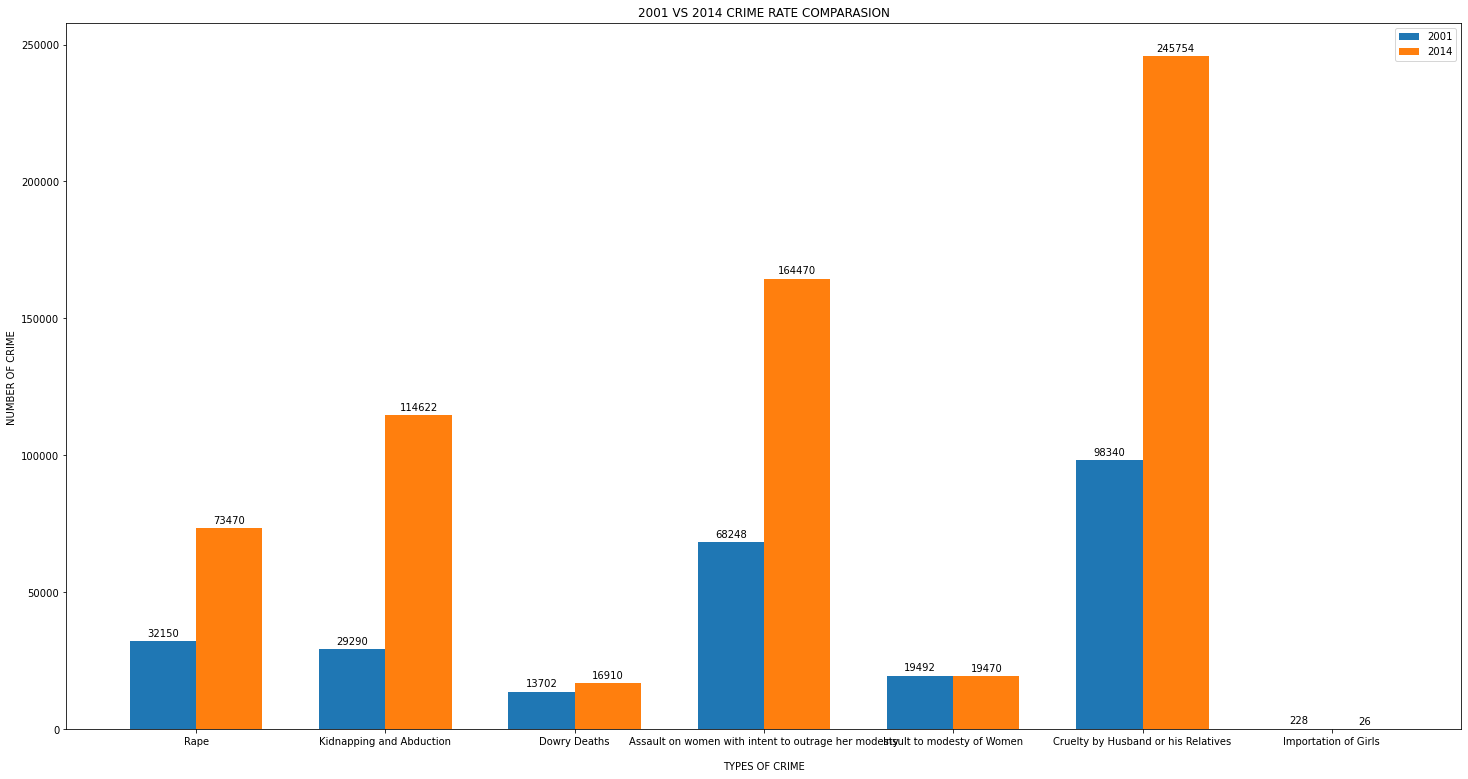

In [35]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,10)
a=np.arange(len(total_case_all_years.T.index))
width=0.35
fig, ax = plt.subplots()
rects1 = ax.bar(a - width/2, total_case_all_years.T[2001], width, label='2001')
rects2 = ax.bar(a + width/2, total_case_all_years.T[2014], width, label='2014')
ax.set_xticks(a)
ax.set_xticklabels(total_case_all_years.T.index)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(25,13)
plt.xlabel('\nTYPES OF CRIME')
plt.ylabel('NUMBER OF CRIME ')
plt.title('2001 VS 2014 CRIME RATE COMPARASION')

## Insights

|Crime |Increase/Decrease Percentage|
|------|------|
|  Rape| Increased By 128 % |
|**<font color='red'>Kidnapping and Abduction**  |**<font color='red'>Increased By 291.33%**|
|Dowry Deaths | Inccreased By 23.41 %|
|Assault on women  |Increased By 140.98 %|
| Insult to modesty of Women|Decreased By 0.11 %|
|Cruelty by Husband or his Relatives|Increased By 149.9 % |
| **<font color='green'>Importation of Girls**|**<font color='green'>Decreased By 88.59 %** |

## <font color='brown'>Change In Crime Rate of States/UT In 14 Years (2001-2014) 

In [36]:
data_2001=pd.DataFrame()

for i in df.columns[2:]:
    data_2001[i]=df[df.Year==2001].groupby('STATE/UT')[i].sum()//2
    
data_2001.head()
data_2001['Total Cases in 2001']=data_2001.sum(axis=1)


data_2014=pd.DataFrame()

for i in df.columns[2:]:
    data_2014[i]=df[df.Year==2014].groupby('STATE/UT')[i].sum()//2
    
data_2014['Total Cases in 2014']=data_2014.sum(axis=1)
#data_2014.drop(['TELANGANA'],inplace=True)

In [37]:
comparasion_between_2001_2014=pd.DataFrame()

comparasion_between_2001_2014['STATE/UT']=data_2001.index
comparasion_between_2001_2014.set_index('STATE/UT',inplace=True)

comparasion_between_2001_2014['Total Cases in 2001']=data_2001['Total Cases in 2001']
comparasion_between_2001_2014['Total Cases in 2014']=data_2014['Total Cases in 2014']

comparasion_between_2001_2014['Increase in number of crimes in 14 Years']=data_2014['Total Cases in 2014']-data_2001['Total Cases in 2001']

In [38]:
comparasion_between_2001_2014

,Total Cases in 2001,Total Cases in 2014,Increase in number of crimes in 14 Years
STATE/UT,,,
A & N ISLANDS,34,112,78.0
ANDHRA PRADESH,13669,15455,1786.0
ARUNACHAL PRADESH,180,341,161.0
ASSAM,4048,18790,14742.0
BIHAR,4489,12553,8064.0
CHANDIGARH,146,424,278.0
CHHATTISGARH,3964,6122,2158.0
D & N HAVELI,19,21,2.0
DAMAN & DIU,7,7,0.0


## <font color='red'>Top 5 States / UT  Where Crime Rate Has Increased The Most 
with highest increase in number of crime rates

In [39]:
comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years',ascending=False).head()

,Total Cases in 2001,Total Cases in 2014,Increase in number of crimes in 14 Years
STATE/UT,,,
WEST BENGAL,6533,36438,29905.0
RAJASTHAN,12057,30510,18453.0
UTTAR PRADESH,19858,35667,15809.0
ASSAM,4048,18790,14742.0
MADHYA PRADESH,14504,27986,13482.0


<Figure size 720x720 with 0 Axes>

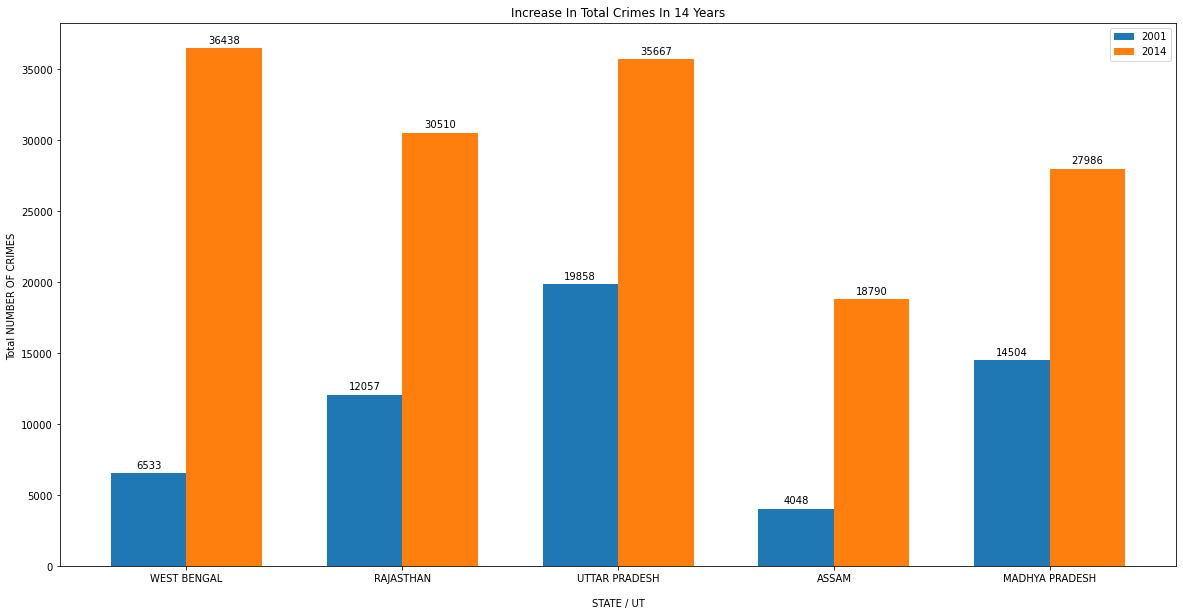

In [40]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,10)
a=np.arange(5)
width=0.35
fig, ax = plt.subplots()
rects1 = ax.bar(a - width/2, comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years',ascending=False).head()['Total Cases in 2001'], width, label='2001')
rects2 = ax.bar(a + width/2, comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years',ascending=False).head()['Total Cases in 2014'], width, label='2014')
ax.set_xticks(a)
ax.set_xticklabels(comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years',ascending=False).head().index)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.xlabel('\nSTATE / UT')
plt.ylabel('Total NUMBER OF CRIMES ')
plt.title('Increase In Total Crimes In 14 Years')

fig = px.bar(comparasion_between_2001_2014, x=comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years',ascending=False).head().index, 
             y=comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years',ascending=False).head()['Increase in number of crimes in 14 Years'],
            labels={
                'y':'Increase in number of cases in 14 Years',
                'x':'STATES / UT'
            },color_discrete_sequence=['black'])
fig.show()

## <font color='red'>Top 5 States/UT With Minimun Increase In Crime Rate In 14 Years

In [41]:
comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years').head()

,Total Cases in 2001,Total Cases in 2014,Increase in number of crimes in 14 Years
STATE/UT,,,
PUDUCHERRY,78,62,-16.0
DAMAN & DIU,7,7,0.0
D & N HAVELI,19,21,2.0
LAKSHADWEEP,0,4,4.0
NAGALAND,29,63,34.0


<Figure size 720x720 with 0 Axes>

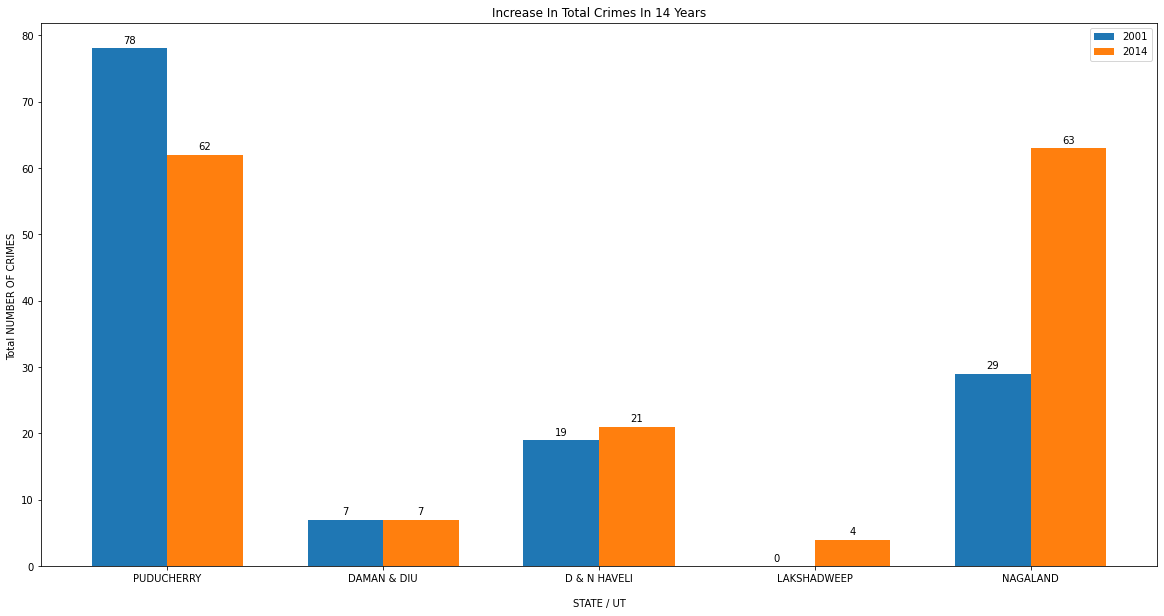

In [42]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10,10)
a=np.arange(5)
width=0.35
fig, ax = plt.subplots()
rects1 = ax.bar(a - width/2, comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years').head()['Total Cases in 2001'], width, label='2001')
rects2 = ax.bar(a + width/2, comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years').head()['Total Cases in 2014'], width, label='2014')
ax.set_xticks(a)
ax.set_xticklabels(comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years').head().index)
ax.legend()
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(20,10)
plt.xlabel('\nSTATE / UT')
plt.ylabel('Total NUMBER OF CRIMES ')
plt.title('Increase In Total Crimes In 14 Years')

fig = px.bar(comparasion_between_2001_2014, x=comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years').head().index, 
             y=comparasion_between_2001_2014.sort_values(by='Increase in number of crimes in 14 Years').head()['Increase in number of crimes in 14 Years'],
            labels={
                'y':'Increase in number of cases in 14 Years',
                'x':'STATES / UT'
            },color_discrete_sequence=['deepskyblue'])
fig.show()

|||
|------|------|
|**Total Number of Crimes between 2001 - 2014 :**| 2660805  |
|**Highest reported crime :**| Cruelty by Husband or his Relatives (42%) of total cases|
|**State/UT with lowest crime rate :**|LAKSHADWEEP with 0.000101 % of total case|
|**State/UT with highest crime rate :**|UTTAR PRADESH with 10.9 % of total case |
|**Highest Number of Rape Cases :**|MADHYA PRADESH|
|**Highest Number of Kidnapping and Abduction Cases :**|UTTAR PRADESH|
|**Highest Number of Dowry Deaths Cases :**|UTTAR PRADESH|
|**Highest Number of Assault on women with intent to outrage her modesty Cases :**|Madhya Pradesh|
|**Highest Number of Insult to modesty of Women cases :**|ANDHRA PRADESH|
|**Highest Number of Cruelty by Husband or his Relatives Cases:**|WEST BENGAL|
|**Highest Number of Importation of Girls Cases:**|BIHAR|
|**Lowest Number of Rape Cases :**|LAKSHADWEEP|
|**Lowest Number of Kidnapping and Abduction Cases :**|LAKSHADWEEP|
|**Lowest Number of Dowry Deaths Cases :**|LAKSHADWEEP|
|**Lowest Number of Assault on women with intent to outrage her modesty cases :**|LAKSHADWEEP|
|**Lowest Number of Insult to modesty of Women cases :**|DAMAN & DIU|
|**Lowest Number of Cruelty by Husband or his Relatives cases :**|LAKSHADWEEP|
|**Lowest Number of Importation of Girls cases:**|A & N ISLANDS|

>## <font color='darkgreen'>**Puducherry is the only state/UT where crime rate has decreased in 14 years**

>## <font color='gunjan'>**Daman And Diu is the only State/UT where crime rate has neither increased nor decreased in 14 years**